# Content: basic image processing with scikit image
## Author: Juber Rahman <br>
## Ranked #1 on DataCamp Leaderboard
### Linkedin: https://www.linkedin.com/in/mdjuberrahman/


In [0]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

import image and check shape

In [0]:
coffee_image = data.coffee()
coins_image = data.coins()
print(coffee_image.shape)
print(coins_image.shape)

(400, 600, 3)
(303, 384)


In [0]:
# show an image
def show_image(image,title='Image',cmap_type='gray'):
  plt.imshow(image,cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

convert image to grayscale

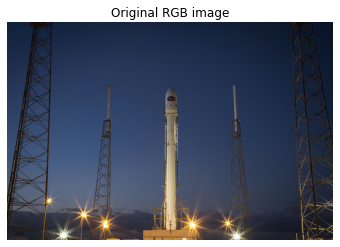

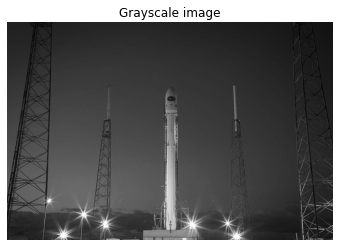

In [0]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

flip image vertically

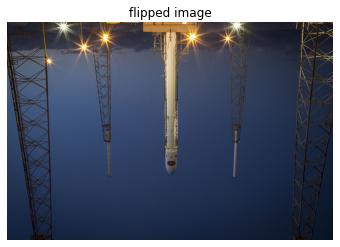

In [0]:
# Flip the image vertically
rocket_vertical_flip = np.flipud(rocket)
show_image(rocket_vertical_flip, 'flipped image')

# get seperate image channel (RGB)

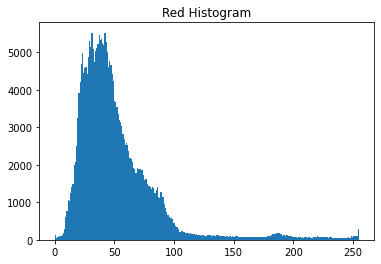

In [0]:
# Obtain the red channel
red_channel = rocket[:,:,0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

Apply global threshold.<br> In this exercise, We'll transform a photograph to binary so we can separate the foreground from the background. To do so, we need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image. We'll see the resulting binarized image when using the show_image() function, previously explained.

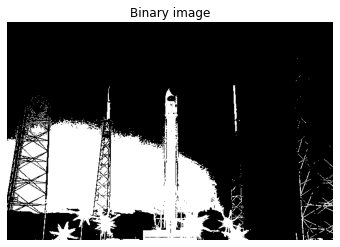

In [0]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Make the image grayscale using rgb2gray
rocket_image_gray = rgb2gray(rocket)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(rocket_image_gray)

# Apply thresholding to the image
binary = rocket_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

## Finding optimal threshold

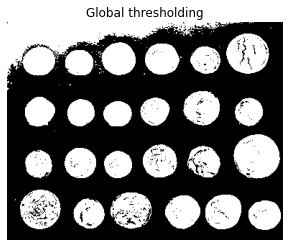

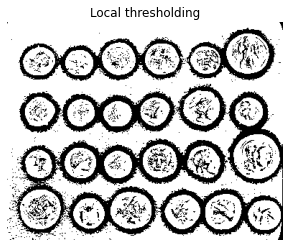

In [0]:
from skimage.filters import threshold_otsu

page_image=data.coins()

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

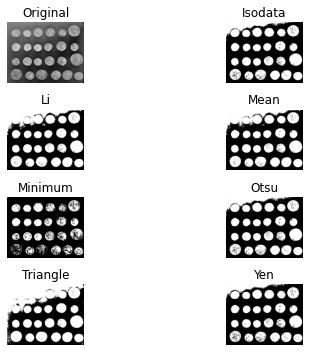

In [0]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits image to grayscale
grayscale = rgb2gray(page_image)

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

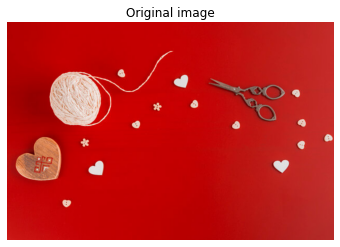

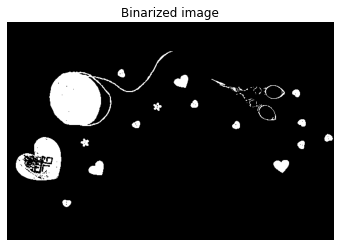

In [0]:
# Import threshold and gray convertor functions
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.io import imread, imshow

tools_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/06b99c764a8d81145e33a9ac3ace8dade55fced2/shapes52.jpg')

# Show the image
show_image(tools_image, 'Original image')
# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

##Edge detection

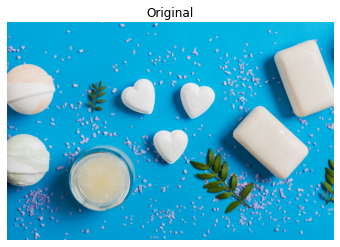

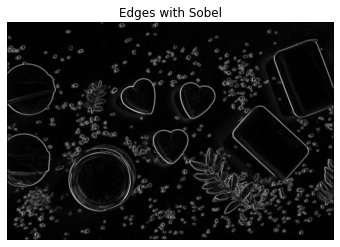

In [0]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

soaps_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/e40f9d1aec6b6394f636d3e96e5bc46a123f2545/soaps.jpg')

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

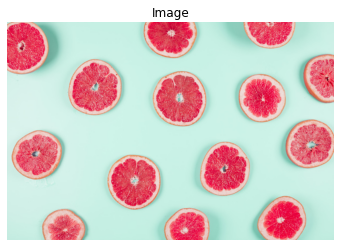

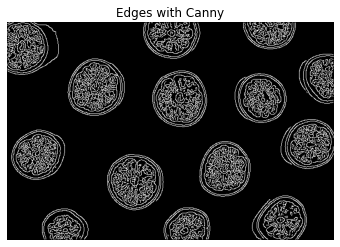

In [0]:
# Finding the edges with Canny
# Import the canny edge detector 
from skimage.color import rgb2gray
from skimage.feature import canny

grapefruit=imread('https://assets.datacamp.com/production/repositories/4470/datasets/c043d452dc01e6b6ce647e5f31afb20283879f22/toronjas.jpg')
show_image(grapefruit)
# Convert image to grayscale
grapefruit = rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

Gaussian filter

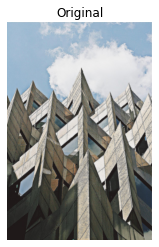

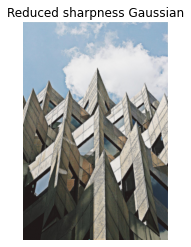

In [0]:
# Import Gaussian filter 
from skimage.filters import gaussian

building_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/0782692803666712f80e62b7ca83e803861b6ed6/toa-sharp-def-3.jpg')

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

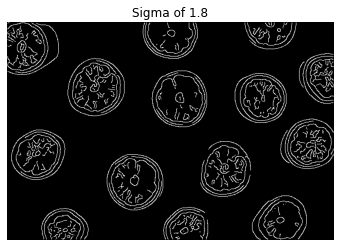

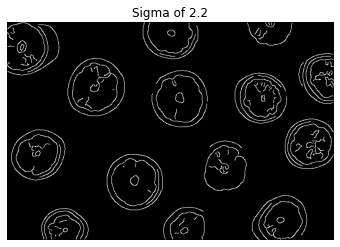

In [0]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")
# Notice the bigger the sigma less edge is detected as gaussian filter is pre-applied

## Contrast enhancement

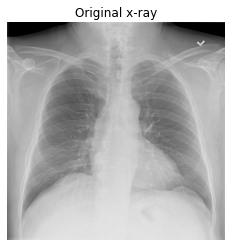

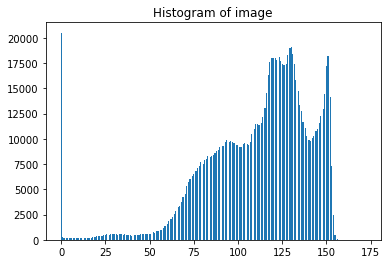

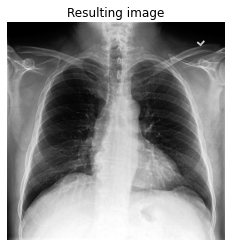

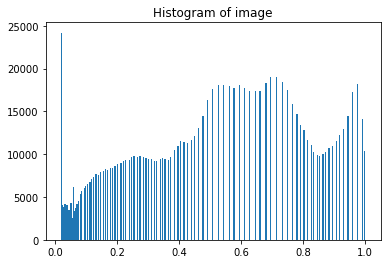

In [0]:
# Import the required module
from skimage import exposure

chest_xray_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/a0abe7fb876883411f306561c000e6cdecfe4e91/contrast_00000109_005.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

plt.title('Histogram of image')
plt.hist(xray_image_eq.ravel(), bins=256)
plt.show()

In this exercise, we will improve the quality of an aerial image of a city. The image has low contrast and therefore we can not distinguish all the elements in it.

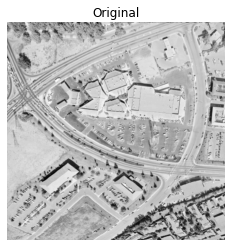

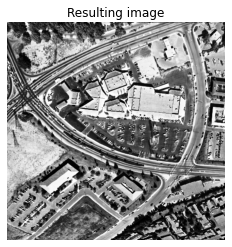

In [0]:
# Import the required module
from skimage import exposure

image_aerial=imread('https://assets.datacamp.com/production/repositories/4470/datasets/bcdab87fe0975f4451869ead252972396da2d83b/5.2.09.png')

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

local contrast enhancement: Contrast Limited Adaptive Histogram Equalization (CLAHE) function

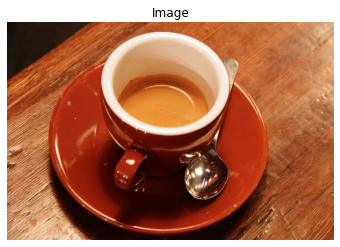

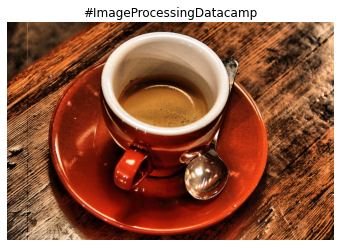

In [0]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

## Aliasing, rotating and rescaling


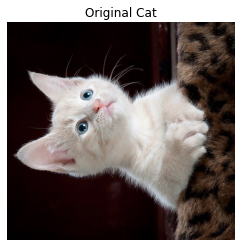

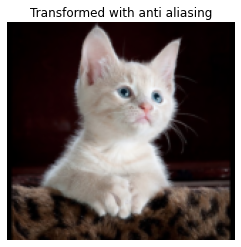

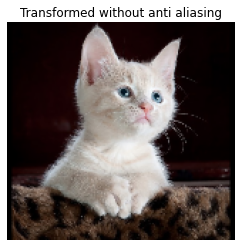

In [0]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale
image_cat=imread('https://assets.datacamp.com/production/repositories/4470/datasets/98ae7ee183329b00b10f2e0bcc4e25943e03aebd/kitty2.jpg')
show_image(image_cat, "Original Cat")
# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

## Enlarging images

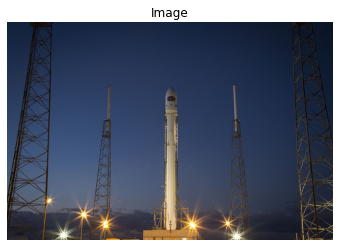

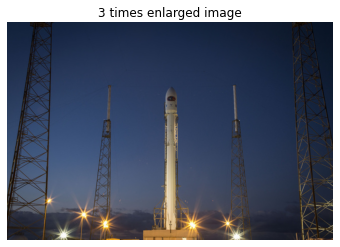

(427, 640, 3)
(1281, 1920, 3)


In [0]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")
print(rocket_image.shape)
print(enlarged_rocket_image.shape)

## Proportionally resizing

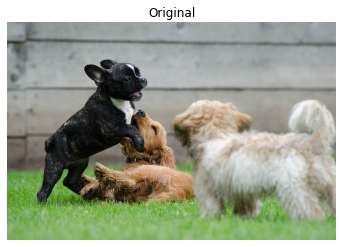

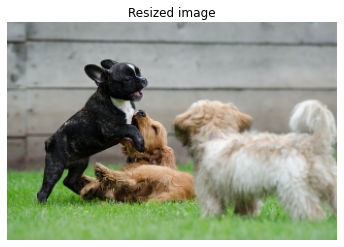

(423, 640, 3) (211, 320, 3)


In [0]:
# Import the module and function
from skimage.transform import resize

dogs_banner=imread('https://assets.datacamp.com/production/repositories/4470/datasets/736b12a3d210b0ac3f6bca28174cfd6522a0ad06/dogs4.jpg')

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and rotated image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')

print(dogs_banner.shape,image_resized.shape)

## morphological operation

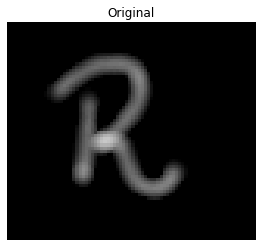

In [0]:
# Import the morphology module
from skimage import morphology

upper_r_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/2c10093e2b260a87d83dc48a724b68dc9bb8e092/r5.png')

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
show_image(upper_r_image, 'Original')


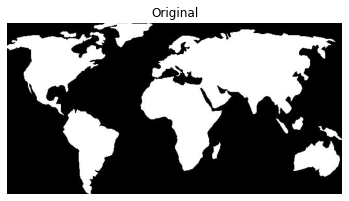

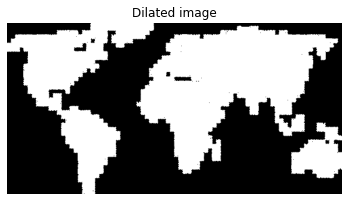

In [0]:
# Import the module
from skimage import morphology

world_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/4cb480ae93ab7dd7b8b17e4b88e8acb20a0d7d6a/world_image_binary.jpg')
# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')

## Image restoration

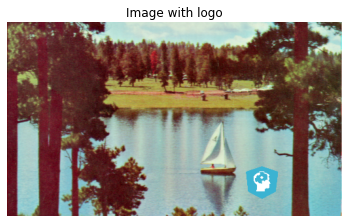

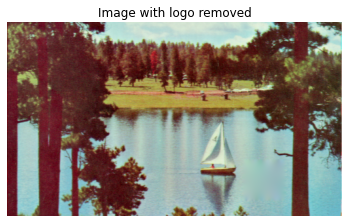

In [0]:
from skimage.restoration import inpaint
image_with_logo=imread('https://assets.datacamp.com/production/repositories/4470/datasets/3fabad1e29879cba6fe5c0cb7d47d41cf9141437/4.2.06_w_logo_2_2.png')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, 
                                                mask, 
                                                multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')


## Dealing with Noise




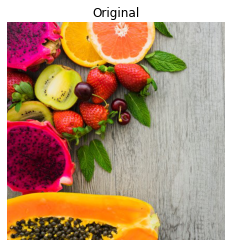

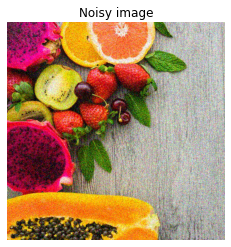

In [0]:
# Import the module and function
from skimage.util import random_noise

fruit_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/b21f1547950fbfdde7c48643a706db0d158aac3b/fruits_square.jpg')
# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

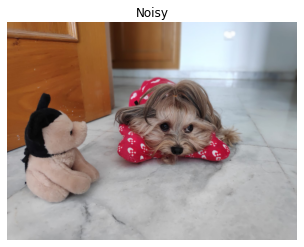

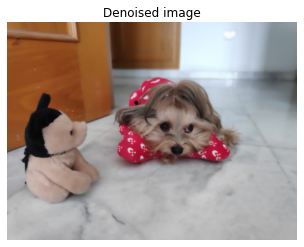

In [0]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

noisy_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/856da76937ad35d3bb407d4f2e8ad7c26e40edac/miny.jpeg')

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

Reducing noise while preserving edges

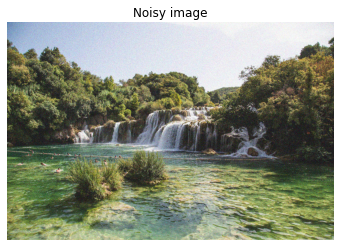

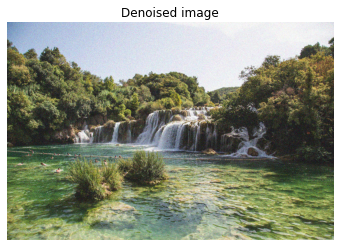

In [0]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

landscape_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/68eed92ae8b528be511a7b0b7734e04b5c0f2da8/noise-noisy-nature.jpg')

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

## Segmentation

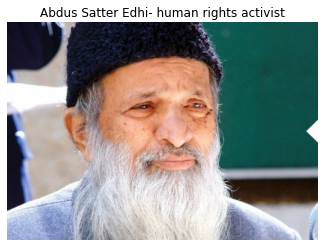

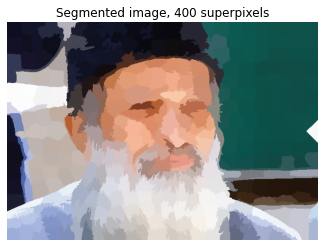

In [0]:
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb
# load the image 
face_image=imread('https://github.com/juberrahman/Pattern-Recognition/blob/master/Image%20Processing/images/Abdul-Sattar-Edhi-2.jpg?raw=true')

#show the image
show_image(face_image,'Abdus Satter Edhi- human rights activist')
# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

## contouring shapes

In [0]:
'''
import re
import inspect
print (inspect.getsource(re.compile))
def compile(pattern, flags=0):
    "Compile a regular expression pattern, returning a pattern object."
    return _compile(pattern, flags)
'''

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

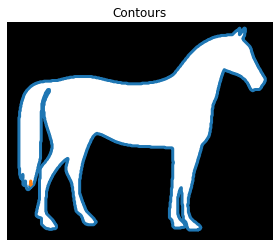

In [0]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

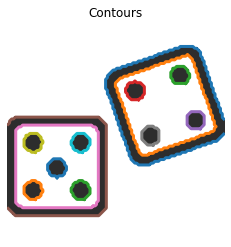

In [0]:
# Make the image grayscale
image_dices=imread('https://assets.datacamp.com/production/repositories/4470/datasets/b9bcf87a160d32d41517c9dc9429cc6b7ec10ac5/dices.png')
image_dices = color.rgb2gray(image_dices)

# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dices, contours)



Count the dots in a dice's image

(255, 2)
(221, 2)
(43, 2)
(45, 2)
(41, 2)
(173, 2)
(181, 2)
(43, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)


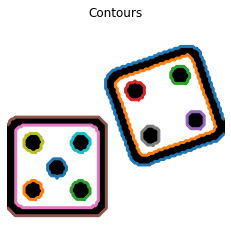

Dice's dots number: 9. 


In [0]:
for contour in contours:
  print(contour.shape)

# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

Reference:<br>
Image Processing in Python Skill Track, DataCamp